In [1]:
import warnings
warnings.filterwarnings('ignore')
#Data processing 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import roc_curve, auc
#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
#Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
#model validation
from sklearn.metrics import log_loss, roc_auc_score, precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score, matthews_corrcoef
from sklearn import metrics 
#Cross validation 
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

# Notebook Overview 
## 1. Importing libraries
## 2. Loading the dataset
## 3. 

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Data processing 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import roc_curve, auc
#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
#Train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
#model validation
from sklearn.metrics import log_loss, roc_auc_score, precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, fbeta_score, matthews_corrcoef
from sklearn import metrics 
#Cross validation 
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

In [33]:
df = pd.read_csv('heart_data.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg,max_heart_rate,exercise_induced_chest_pain,st_depression,st_slope,stained_blood_vessels,blood_disorder,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [34]:
#Converting features to categorical names for better interpretation 
#chestpaintype
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'Typical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'Atypical_angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'Non-anginal_pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'Asymptomatic'
#ecg 
df['ecg'][df['ecg'] == 0] = 'Normal'
df['ecg'][df['ecg'] == 1] = 'Abnormality_type_A'
df['ecg'][df['ecg'] == 2] = 'Abnormality_type_B'
#St_Slope find a paper to support the types 
df['st_slope'][df['st_slope'] == 0] = 'slope 1'
df['st_slope'][df['st_slope'] == 1] = 'slope 2'
df['st_slope'][df['st_slope'] == 2] = 'slope 3'
#Sex 
df['sex'] = df.sex.apply(lambda x: 'male' if x == 1 else 'female')
#Blood disorder 
df['blood_disorder'][df['blood_disorder'] == 0] = 'Normal'
df['blood_disorder'][df['blood_disorder'] == 1] = 'Irreversible_Damage'
df['blood_disorder'][df['blood_disorder'] == 2] = 'Reversible_Damage'
df['blood_disorder'][df['blood_disorder'] == 3] = 'Unkown_Type'
#exercise induced angina 
df['exercise_induced_chest_pain'][df['exercise_induced_chest_pain'] == 0] = 'No_Pain_Observed'
df['exercise_induced_chest_pain'][df['exercise_induced_chest_pain'] == 1] = 'Pain_Observed'

In [35]:
# Compute Z-score
z_scores = np.abs(stats.zscore(df[['age', 'max_heart_rate', 'cholesterol', 'resting_blood_pressure']]))  
df_filtered = df[(z_scores < 3).all(axis=1)]  # Keep rows where Z-score < 3


In [36]:
df['heart_disease'].value_counts(normalize=True)  # Before
df_filtered['heart_disease'].value_counts(normalize=True)  # After



heart_disease
1    0.519481
0    0.480519
Name: proportion, dtype: float64

In [41]:
outliers_removed = 1025 - len(df_filtered)
print(f"Total Outliers Removed: {outliers_removed}")


Total Outliers Removed: 24


24 outliers which are outliers are now removed 

Encoding of categorical variables 

In [42]:
df = pd.get_dummies(df_filtered, drop_first= True)
df

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,st_depression,stained_blood_vessels,heart_disease,sex_male,chest_pain_type_Atypical_angina,chest_pain_type_Non-anginal_pain,chest_pain_type_Typical_angina,ecg_Abnormality_type_B,ecg_Normal,exercise_induced_chest_pain_Pain_Observed,st_slope_slope 2,st_slope_slope 3,blood_disorder_Normal,blood_disorder_Reversible_Damage,blood_disorder_Unkown_Type
0,52,125,212,0,168,1.0,2,0,True,False,False,True,False,False,False,False,True,False,False,True
1,53,140,203,1,155,3.1,0,0,True,False,False,True,False,True,True,False,False,False,False,True
2,70,145,174,0,125,2.6,0,0,True,False,False,True,False,False,True,False,False,False,False,True
3,61,148,203,0,161,0.0,1,0,True,False,False,True,False,False,False,False,True,False,False,True
4,62,138,294,1,106,1.9,3,0,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,140,221,0,164,0.0,0,1,True,True,False,False,False,False,True,False,True,False,True,False
1021,60,125,258,0,141,2.8,1,0,True,False,False,True,False,True,True,True,False,False,False,True
1022,47,110,275,0,118,1.0,1,0,True,False,False,True,False,True,True,True,False,False,True,False
1023,50,110,254,0,159,0.0,0,1,False,False,False,True,False,True,False,False,True,False,True,False


In [44]:
df.shape

(1001, 20)

Seggregate features and target features 

In [45]:
X = df.drop(['heart_disease'], axis =1)
y = df['heart_disease']

Check Correlation 


<Axes: title={'center': 'Correlation'}>

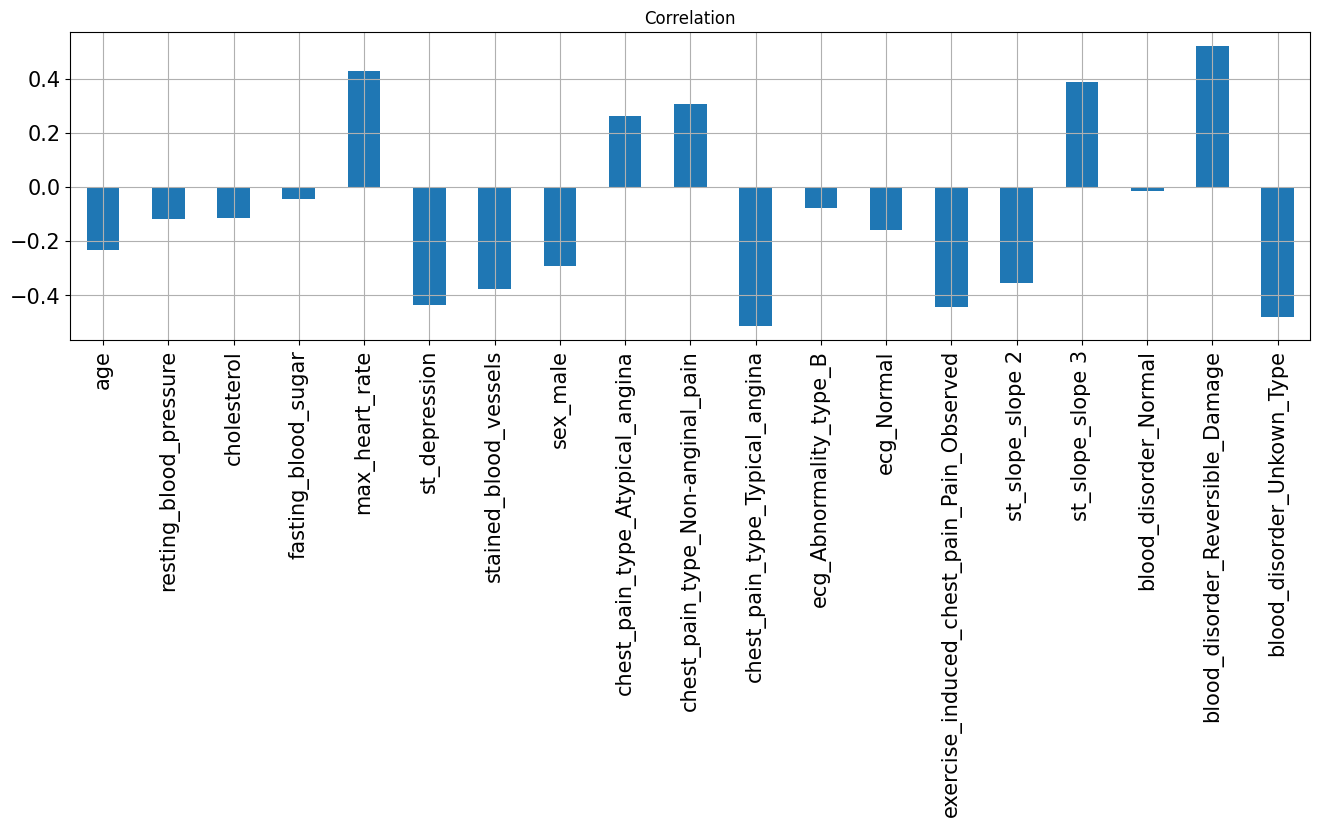

In [46]:
X.corrwith(y).plot.bar(
    figsize = (16,4), title = 'Correlation', fontsize = 15, rot = 90
, grid = True)

In [2]:
corr_matrix = df.corr(method='pearson')

# 2. Plot the correlation matrix as a heatmap using a pastel color map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        # Show correlation values
            cmap='Pastel1',    # Pastel color scheme
            vmin=-1, vmax=1,   # Correlation ranges from -1 to 1
            square=True)

plt.title("Correlation Heatmap")
plt.show()

NameError: name 'df' is not defined

Train Test split with stratified sampling 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)



In [48]:
print(f"Distribution of target variable in train set: ", y_train.value_counts())
print(f"Distribution of target variable in test set: ", y_test.value_counts())

Distribution of target variable in train set:  heart_disease
1    416
0    384
Name: count, dtype: int64
Distribution of target variable in test set:  heart_disease
1    104
0     97
Name: count, dtype: int64


In [49]:
print(f"Shape of train set: ", X_train.shape,  y_train.shape)
print(f"Shape of test set: ", X_test.shape, y_test.shape)

Shape of train set:  (800, 19) (800,)
Shape of test set:  (201, 19) (201,)


Feature Normalization 

In [50]:
scaler = MinMaxScaler()
X_train[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression', 'stained_blood_vessels']] = scaler.fit_transform(X_train[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression', 'stained_blood_vessels']])
X_train.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,st_depression,stained_blood_vessels,sex_male,chest_pain_type_Atypical_angina,chest_pain_type_Non-anginal_pain,chest_pain_type_Typical_angina,ecg_Abnormality_type_B,ecg_Normal,exercise_induced_chest_pain_Pain_Observed,st_slope_slope 2,st_slope_slope 3,blood_disorder_Normal,blood_disorder_Reversible_Damage,blood_disorder_Unkown_Type
451,0.416667,0.465116,0.541045,0,0.649123,0.000000,0.00,False,True,False,False,False,False,False,True,False,False,True,False
573,0.312500,0.209302,0.611940,0,0.570175,0.000000,0.25,True,False,False,True,False,True,False,False,True,False,True,False
249,0.270833,0.418605,0.201493,0,0.543860,0.000000,0.00,True,False,True,False,False,False,False,False,True,False,True,False
933,0.187500,0.302326,0.391791,0,0.824561,0.612903,0.00,True,False,False,False,False,False,True,True,False,False,False,True
446,0.500000,0.418605,0.447761,1,0.745614,0.000000,0.75,True,False,True,False,False,True,False,False,True,False,True,False


In [51]:
X_test[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression', 'stained_blood_vessels']] = scaler.fit_transform(X_test[['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate', 'st_depression', 'stained_blood_vessels']])
X_test.head()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,st_depression,stained_blood_vessels,sex_male,chest_pain_type_Atypical_angina,chest_pain_type_Non-anginal_pain,chest_pain_type_Typical_angina,ecg_Abnormality_type_B,ecg_Normal,exercise_induced_chest_pain_Pain_Observed,st_slope_slope 2,st_slope_slope 3,blood_disorder_Normal,blood_disorder_Reversible_Damage,blood_disorder_Unkown_Type
501,0.025,0.4750,0.250000,0,0.877551,0.225806,0.00,False,False,False,True,False,False,False,False,True,False,True,False
583,0.225,0.2500,0.223684,0,0.244898,0.403226,0.00,True,False,False,True,False,True,True,True,False,False,False,True
447,0.525,0.7500,0.714912,0,0.500000,0.129032,0.25,True,False,False,True,False,True,True,True,False,False,False,True
106,0.425,0.5000,0.758772,0,0.785714,0.258065,0.00,True,False,False,True,False,False,True,False,True,False,False,True
317,0.725,0.4375,0.552632,0,0.775510,0.000000,0.00,False,False,True,False,False,True,False,False,True,False,True,False


Model Building 


In [ ]:


# Define hyperparameter grids
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "criterion": ["gini", "entropy"],
        "max_depth": [5, 10, 15, None]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "GradientBoosting": {
        "n_estimators": [100, 200, 500],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "DecisionTree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
        "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear", "saga"],  # 'saga' supports l1 or l2; 'liblinear' supports l1 or l2
        "max_iter": [100, 200, 500]
    }
}


In [17]:
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best accuracy: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_  # Return best model


In [18]:
# Tune and train best models
knn_best = tune_hyperparameters(KNeighborsClassifier(), param_grids["KNN"], X_train, y_train)
rf_best = tune_hyperparameters(RandomForestClassifier(), param_grids["RandomForest"], X_train, y_train)
xgb_best = tune_hyperparameters(xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grids["XGBoost"], X_train, y_train)
gbm_best = tune_hyperparameters(GradientBoostingClassifier(), param_grids["GradientBoosting"], X_train, y_train)
cart_best = tune_hyperparameters(DecisionTreeClassifier(), param_grids["DecisionTree"], X_train, y_train)


Best parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best accuracy: 0.9938
Best parameters for RandomForestClassifier: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Best accuracy: 0.9900
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best accuracy: 0.9900
Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best accuracy: 0.9912
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Best accuracy: 0.9875


In [19]:
def evaluate_model(y_test, y_pred, model_name):
    CM = confusion_matrix(y_test, y_pred)
    
    # Extracting TP, TN, FP, FN
    TN, FP, FN, TP = CM.ravel()

    # Calculating metrics
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    loss_log = log_loss(y_test, y_pred)
    mathew = matthews_corrcoef(y_test, y_pred)

    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Heart Disease"], 
                yticklabels=["No Disease", "Heart Disease"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Return results as a dictionary
    return [model_name, acc, prec, rec, specificity, f1, roc, loss_log, mathew]


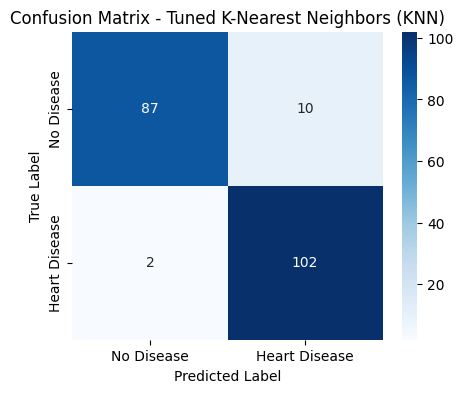

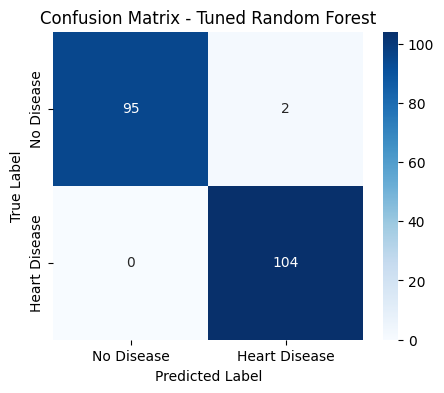

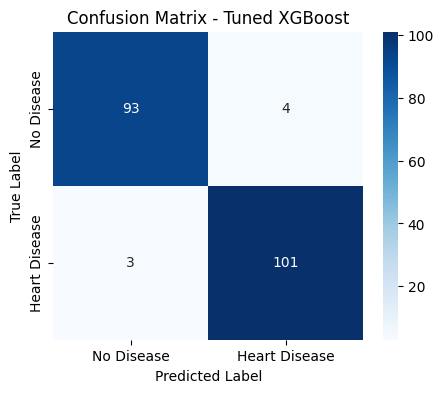

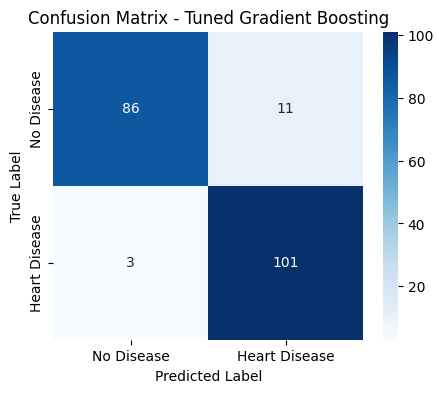

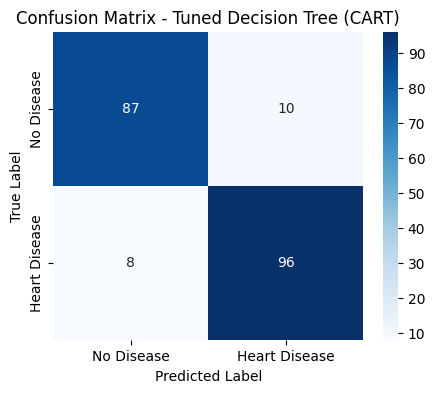

                             Model  Accuracy  Precision  Sensitivity (Recall)  \
0  Tuned K-Nearest Neighbors (KNN)  0.940299   0.910714              0.980769   
1              Tuned Random Forest  0.990050   0.981132              1.000000   
2                    Tuned XGBoost  0.965174   0.961905              0.971154   
3          Tuned Gradient Boosting  0.930348   0.901786              0.971154   
4       Tuned Decision Tree (CART)  0.910448   0.905660              0.923077   

   Specificity  F1 Score   ROC_AUC  Log_Loss  Matthews Corr  
0     0.896907  0.944444  0.938838  2.151860       0.882944  
1     0.979381  0.990476  0.989691  0.358643       0.980256  
2     0.958763  0.966507  0.964958  1.255252       0.930286  
3     0.886598  0.935185  0.928876  2.510503       0.862899  
4     0.896907  0.914286  0.909992  3.227790       0.820717  


In [20]:
# Generate predictions using the tuned models
y_pred_knn_best = knn_best.predict(X_test)
y_pred_rf_best = rf_best.predict(X_test)
y_pred_xgb_best = xgb_best.predict(X_test)
y_pred_gbm_best = gbm_best.predict(X_test)
y_pred_cart_best = cart_best.predict(X_test)

# Store evaluation results
tuned_model_results = []

# Evaluate each tuned model
tuned_model_results.append(evaluate_model(y_test, y_pred_knn_best, "Tuned K-Nearest Neighbors (KNN)"))
tuned_model_results.append(evaluate_model(y_test, y_pred_rf_best, "Tuned Random Forest"))
tuned_model_results.append(evaluate_model(y_test, y_pred_xgb_best, "Tuned XGBoost"))
tuned_model_results.append(evaluate_model(y_test, y_pred_gbm_best, "Tuned Gradient Boosting"))
tuned_model_results.append(evaluate_model(y_test, y_pred_cart_best, "Tuned Decision Tree (CART)"))

# Create DataFrame for easy comparison
df_tuned_results = pd.DataFrame(tuned_model_results, 
                          columns=["Model", "Accuracy", "Precision", "Sensitivity (Recall)", 
                                   "Specificity", "F1 Score", "ROC_AUC", "Log_Loss", "Matthews Corr"])

# Display results
print(df_tuned_results)


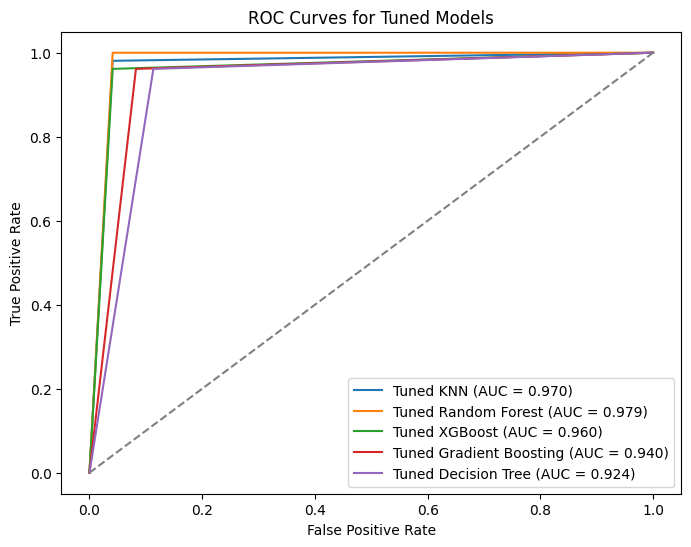

In [ ]:
# Function to plot ROC curves
def plot_roc_curves(y_test, model_preds, model_names):
    plt.figure(figsize=(8, 6))
    
    for y_pred, model_name in zip(model_preds, model_names):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Tuned Models")
    plt.legend()
    plt.show()

# Call function with predictions
plot_roc_curves(y_test, 
                [y_pred_knn_best, y_pred_rf_best, y_pred_xgb_best, y_pred_gbm_best, y_pred_cart_best], 
                ["Tuned KNN", "Tuned Random Forest", "Tuned XGBoost", "Tuned Gradient Boosting", "Tuned Decision Tree"])


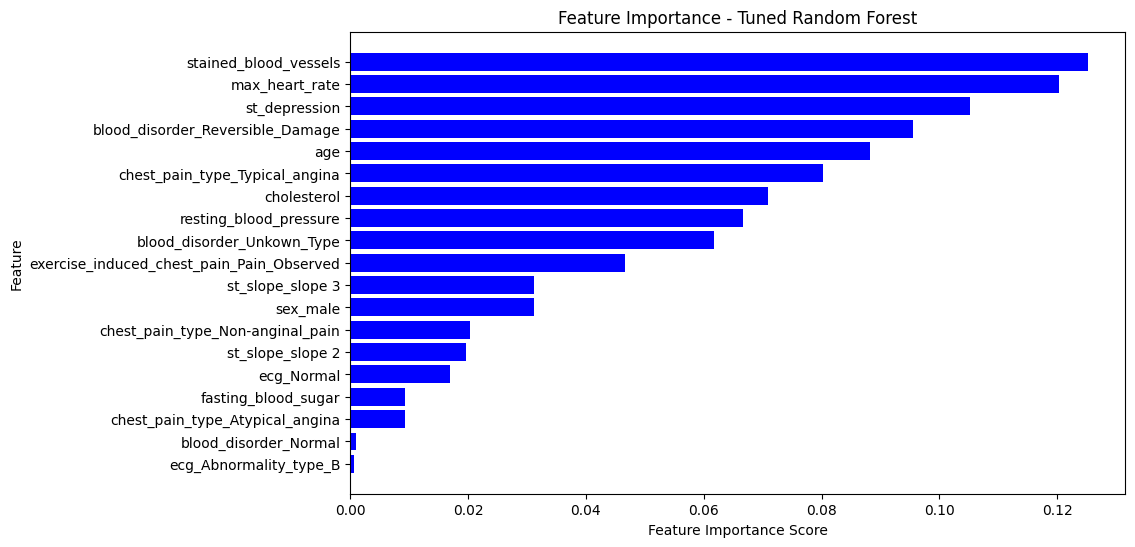

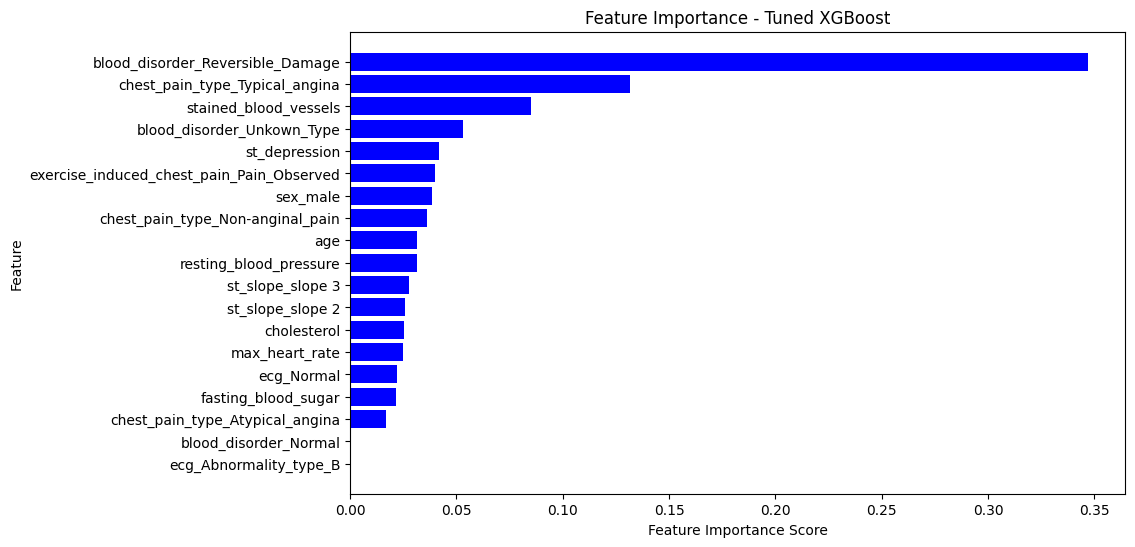

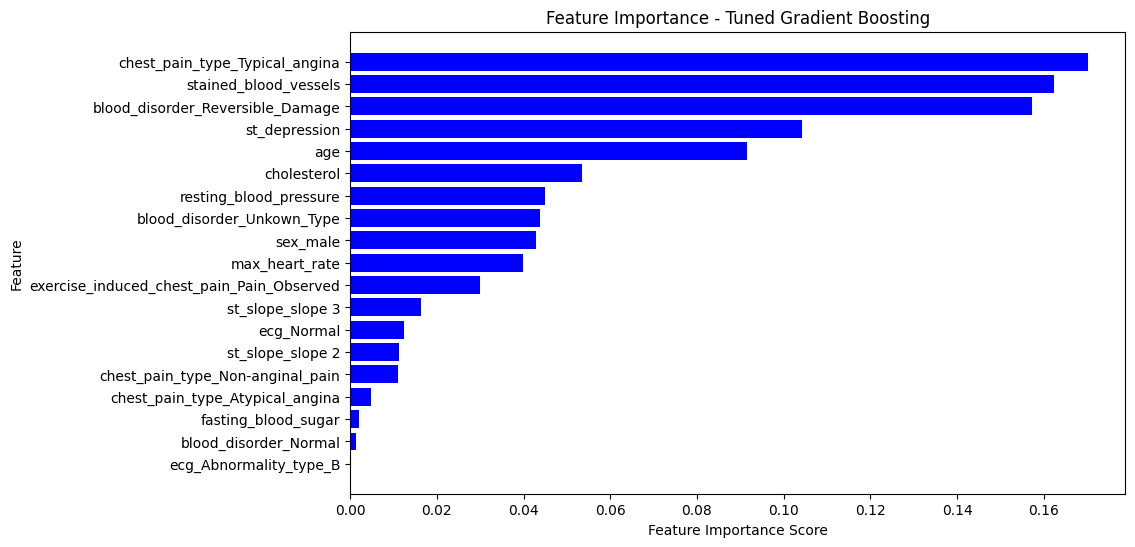

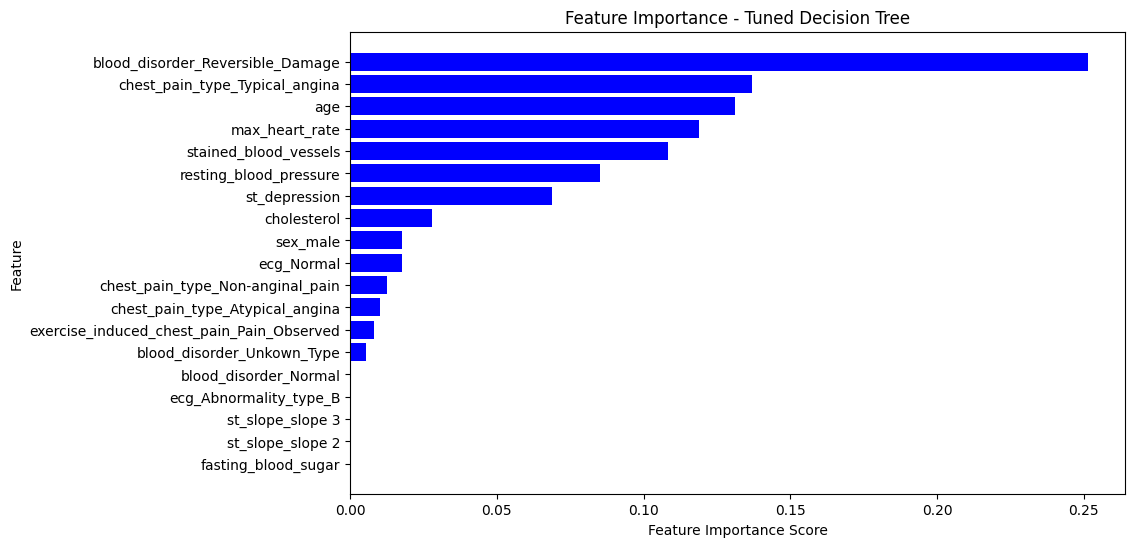

In [ ]:
# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, "feature_importances_"):  # Only works for tree-based models
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]  # Sort in descending order

        plt.figure(figsize=(10, 6))
        plt.barh([feature_names[i] for i in indices], importance[indices], color="blue")
        plt.xlabel("Feature Importance Score")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance - {model_name}")
        plt.gca().invert_yaxis()  # To show the most important feature on top
        plt.show()
    else:
        print(f"{model_name} does not support feature importance.")

# Call function for models that support feature importance
plot_feature_importance(rf_best, X_train.columns, "Tuned Random Forest")
plot_feature_importance(xgb_best, X_train.columns, "Tuned XGBoost")
plot_feature_importance(gbm_best, X_train.columns, "Tuned Gradient Boosting")
plot_feature_importance(cart_best, X_train.columns, "Tuned Decision Tree")


Chest Pain Type (Typical Angina), Blood Disorder (Reversible Damage), Max Heart Rate, ST Depression, and Stained Blood Vessels consistently rank high across multiple models.